In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
iris = pd.read_csv("Datasets\iris.csv")

In [3]:
#Checking data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
#Unique classes in output variable
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
#Class count in output variable (it shows balance dataset)
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [7]:
#Splitting the data into train and test
train,test = train_test_split(iris,test_size = 0.30, random_state = 6) 

In [8]:
train.shape

(105, 5)

In [9]:
test.shape

(45, 5)

In [10]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,3.0,1.4,0.1,setosa
52,6.9,3.1,4.9,1.5,versicolor
27,5.2,3.5,1.5,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor


In [11]:
test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4,5.0,3.6,1.4,0.2,setosa
116,6.5,3.0,5.5,1.8,virginica
2,4.7,3.2,1.3,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
123,6.3,2.7,4.9,1.8,virginica


In [12]:
# for 3 nearest neighbours 
neigh_3 = KNC(n_neighbors= 3)

In [13]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,3.0,1.4,0.1,setosa
52,6.9,3.1,4.9,1.5,versicolor
27,5.2,3.5,1.5,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor


In [14]:
train,test = train_test_split(iris,test_size = 0.25, random_state = 2) 

In [15]:
# Fitting with training data 
x = train.iloc[:,0:4]
y = train.iloc[:,4]
neigh_3.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [16]:
neigh_3.score(x,y) #trining accuracy

0.9464285714285714

In [17]:
#Storing training prediction for cross tabulation
training_pred = neigh_3.predict(x)

In [18]:
#Storing testing prediction for cross tabulation
testing_pred = neigh_3.predict(test.iloc[:,0:4])

In [19]:
# test accuracy 
test_acc = np.mean(neigh_3.predict(test.iloc[:,0:4])==test.iloc[:,4]) # 100%
test_acc

1.0

In [20]:
train.Species.value_counts()

versicolor    39
virginica     39
setosa        34
Name: Species, dtype: int64

In [21]:
test.Species.value_counts()

setosa        16
virginica     11
versicolor    11
Name: Species, dtype: int64

In [22]:
pd.crosstab(train.Species,training_pred)

col_0,setosa,versicolor,virginica
Species,,,
setosa,34,0,0
versicolor,0,36,3
virginica,0,3,36


In [23]:
pd.crosstab(test.Species, testing_pred)

col_0,setosa,versicolor,virginica
Species,,,
setosa,16,0,0
versicolor,0,11,0
virginica,0,0,11


In [24]:
# Preparing another model for 5 nearest neighbours
neigh_5 = KNC(n_neighbors=5)
neigh_5.fit(x,y)

KNeighborsClassifier()

In [25]:
#neigh_5.score(x,y) #trining accuracy

In [26]:
#Storing training prediction for cross tabulation
training_pred_5 = neigh_5.predict(train.iloc[:,0:4])

In [27]:
testing_pred_5 = neigh_5.predict(test.iloc[:,0:4])

In [28]:
train_acc = np.mean(neigh_5.predict(train.iloc[:,0:4])==train.iloc[:,4]) # 100%
train_acc

0.9553571428571429

In [29]:
# test accuracy
test_acc = np.mean(neigh_5.predict(test.iloc[:,0:4])==test.iloc[:,4]) # 100%
test_acc

1.0

In [30]:
#print(train_acc,test_acc)

In [31]:
# creating empty list variable  to store accuracy for multiple model with for loop
acc = []

In [32]:
# running KNN algorithm for 3 to 30 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,30,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:4],train.iloc[:,4])
    train_score = neigh.score(x,y)
    test_score = np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4]) 
    #train_acc = np.mean(neigh.predict(train.iloc[:,0:4])==train.iloc[:,4])
    #test_acc = np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4])
    print(test_score)
    acc.append([train_score,test_score])

1.0
1.0
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315


In [33]:
test_score

0.9473684210526315

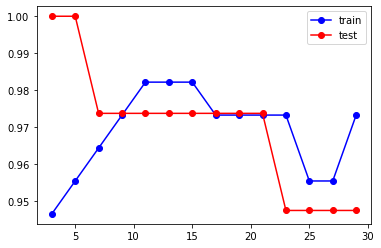

In [34]:
# train accuracy plot 
plt.plot(np.arange(3,30,2),[i[0] for i in acc],"bo-")


# test accuracy plot
plt.plot(np.arange(3,30,2),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])

So, from above plot we have to finalize the optimal value for k and rebuild the final model for deployment